In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()


In [2]:
from keras.datasets import mnist

Using TensorFlow backend.


In [3]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()

In [4]:
x_train.shape

(60000, 28, 28)

In [5]:
y_train.shape

(60000,)

In [6]:
x_test.shape

(10000, 28, 28)

ValueError: num must be 1 <= num <= 25, not 26

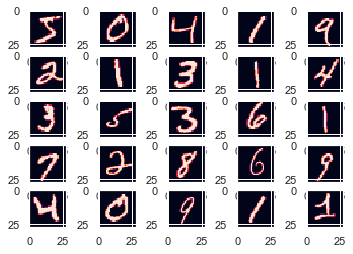

In [7]:
for i,image in enumerate(x_train):
    plt.subplot(5,5,1+i)
    plt.imshow(x_train[i])

In [8]:
from keras.models import Sequential
from keras.layers import Conv2D,Dense,MaxPooling2D,Flatten
from keras.utils import np_utils

In [9]:
x_train = x_train.reshape(-1,28,28,1).astype('float32')
x_test = x_test.reshape(-1,28,28,1).astype('float32')

In [10]:
x_train = x_train/255
x_test = x_test/255

In [11]:
x_train.shape

(60000, 28, 28, 1)

In [12]:
y_train[0]

5

In [13]:
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

In [14]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [15]:
mnist = Sequential()
mnist.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(28,28,1)))
mnist.add(MaxPooling2D(pool_size=(2,2)))
mnist.add(Conv2D(64,(3,3),activation='relu'))
mnist.add(MaxPooling2D(pool_size=(2,2)))
mnist.add(Flatten())
mnist.add(Dense(128,activation='relu'))
mnist.add(Dense(10,activation='softmax'))

In [16]:
mnist.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [17]:
mnist.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               204928    
_________________________________________________________________
dense_2 (Dense)              (None, 10)               

In [18]:
mnist.fit(x_train,y_train,epochs=2,batch_size=100)

Epoch 1/2
60000/60000 [==============================] - 360s 6ms/step - loss: 0.1800 - accuracy: 0.9469
Epoch 2/2
60000/60000 [==============================] - 402s 7ms/step - loss: 0.0531 - accuracy: 0.9834


In [19]:
mnist.evaluate(x_test,y_test)

10000/10000 [==============================] - 29s 3ms/step


[0.03819582643536851, 0.9876999855041504]

In [20]:
prediction = mnist.predict(x_test)
print(np.argmax(np.round(prediction[4])))

4


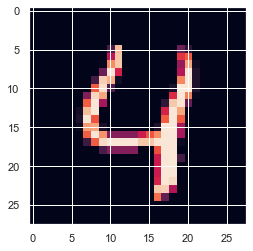

In [23]:
plt.imshow(x_test[4].reshape(28,28))